<a href="https://colab.research.google.com/github/Reem-KR/GEOL-558_Supervised_Classification-_Project/blob/main/Storm_Data_Analysis_Supervised_Classification_Final_Turn_In.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Storm Analysis -Predicting Storm Types**

Reem Alrowaished

February 09 2025

## Introduction:

Storms are powerful natural events that can significantly impact human life, infrastructure, and the environment. Understanding the characteristics and behavior of these storms is essential for forecasting, disaster preparedness, and risk management.

This project uses a comprehensive dataset of storms to predict the storm type (Tropical Storm or Hurricane) based on meteorological characteristics such as wind speed, pressure, and storm size (diameter). Machine learning algorithms will be applied to classify storms accurately and distinguish between these two types of storms. By analyzing these key features, the project aims to build a model that can predict storm types, improving predictive capabilities for storm types and enabling better preparation and response strategies.

Dataset Source: https://www.kaggle.com/datasets/utkarshx27/noaa-atlantic-hurricane-database/data

## Section 1: Overview and Data Cleaning

In [1]:
# I need to install this for the base map
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 21.7 MB/s eta 0:00:00


In [2]:
# Import libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sklearn
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

In [3]:
# Import the Dataset file from Github
url = "https://raw.githubusercontent.com/Reem-KR/GEOL-558_Supervised_Classification-_Project/main/storms.csv"

# Read the CSV file from GitHub and create a dataframe
original_data = pd.read_csv(url)

# Show the first 5 rows
original_data.head(5)

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN


In [4]:
# Check the number of rows and columns of the dataframe
rows, columns = original_data.shape

# Print the number of rows and columns
print(f'The number of rows is: {rows}')
print(f'The number of columns is: {columns}')

The number of rows is: 19066
The number of columns is: 14


In [5]:
# Information of the dataset
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19066 non-null  int64  
 1   name                          19066 non-null  object 
 2   year                          19066 non-null  int64  
 3   month                         19066 non-null  int64  
 4   day                           19066 non-null  int64  
 5   hour                          19066 non-null  int64  
 6   lat                           19066 non-null  float64
 7   long                          19066 non-null  float64
 8   status                        19066 non-null  object 
 9   category                      4684 non-null   float64
 10  wind                          19066 non-null  int64  
 11  pressure                      19066 non-null  int64  
 12  tropicalstorm_force_diameter  9554 non-null   float64
 13  h

The code above provides a summary of the dataset in terms of its structure and the types of data it contains.

I noticed that there is a duplicate in the index as the data has an index, and Python also added an index. So, I need to delete the dataset's original index and keep Python's.

In [6]:
# Removing the extra index column
clean_data=original_data.copy()
clean_data=clean_data.drop(columns= ['Unnamed: 0'])

In [7]:
# Display it to QC
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          19066 non-null  object 
 1   year                          19066 non-null  int64  
 2   month                         19066 non-null  int64  
 3   day                           19066 non-null  int64  
 4   hour                          19066 non-null  int64  
 5   lat                           19066 non-null  float64
 6   long                          19066 non-null  float64
 7   status                        19066 non-null  object 
 8   category                      4684 non-null   float64
 9   wind                          19066 non-null  int64  
 10  pressure                      19066 non-null  int64  
 11  tropicalstorm_force_diameter  9554 non-null   float64
 12  hurricane_force_diameter      9554 non-null   float64
dtypes

Now, the dataset has no extra unnecessary columns.

In [8]:
# Check for missing data in the entire dataset
missing_data = clean_data.isnull().sum()
missing_data

,0
name,0
year,0
month,0
day,0
hour,0
lat,0
long,0
status,0
category,14382
wind,0


From the code above, I can see that the important columns such as, tropicalstorm_force_diameter	and
hurricane_force_diameter, has some missing values in the dataset which I need to delete.

In [9]:
# Deleting important rows with missing data
clean_data=clean_data.dropna(subset=['tropicalstorm_force_diameter', 'hurricane_force_diameter'])

# QC missing data
missing_data = clean_data.isnull().sum()
missing_data

,0
name,0
year,0
month,0
day,0
hour,0
lat,0
long,0
status,0
category,7503
wind,0


Now, the data is cleaned with no missing values in the important columns.

In [10]:
# Checking the status column to see the types of storms in the dataset
clean_data['status'].unique()

array(['tropical depression', 'tropical storm', 'hurricane',
       'extratropical', 'tropical wave', 'other low', 'subtropical storm',
       'subtropical depression', 'disturbance'], dtype=object)

From the above code, I see that I have more than one storm type in the dataset. So, I will remove most of them and only keep Tropical Storm and Hurricane since I want the model to focus specifically on distinguishing between these two classes.

In [48]:
# Keep only the rows where 'status' is either 'Tropical Storm' or 'Hurricane'
clean_data = clean_data[clean_data['status'].isin(['tropical storm', 'hurricane'])]

# Check the class distribution to see how many examples of each class I have
print(clean_data['status'].value_counts())

status
tropical storm    3425
hurricane         2051
Name: count, dtype: int64


This filters the rows and only keeps the ones where the status is either Tropical Storm or Hurricane.


In [12]:
# Understanding the dataset
clean_data.describe()

,year,month,day,hour,lat,long,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
count,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,2051.000000,5476.000000,5476.000000,5476.000000,5476.000000
mean,2012.678963,8.707633,15.407779,9.114134,24.617294,-63.035829,2.010726,61.814280,986.364682,182.760226,23.716216
std,5.511923,1.324095,8.907259,6.705163,8.203574,19.234188,1.209266,25.607148,20.895717,114.889468,38.682468
min,2004.000000,1.000000,1.000000,0.000000,8.100000,-100.700000,1.000000,35.000000,882.000000,10.000000,0.000000
25%,2008.000000,8.000000,8.000000,6.000000,17.900000,-78.600000,1.000000,40.000000,976.000000,100.000000,0.000000
50%,2012.000000,9.000000,15.000000,12.000000,24.300000,-63.700000,2.000000,55.000000,993.000000,160.000000,0.000000
75%,2018.000000,9.000000,23.000000,16.000000,30.600000,-48.175000,3.000000,75.000000,1002.000000,240.000000,40.000000
max,2021.000000,12.000000,31.000000,23.000000,48.800000,-12.800000,5.000000,160.000000,1013.000000,870.000000,300.000000


The above function was used to compute summary statistics, such as the mean, standard deviation, minimum, and maximum values for the numerical columns in the dataset. This step is fundamental to understand the data's central tendency and spread.

In [13]:
# Show the first 5 rows of the clean dataset
clean_data.head(5)

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
9436,Alex,2004,8,1,18,31.6,-79.2,tropical storm,NaN,35,1009,50.0,0.0
9437,Alex,2004,8,2,0,31.5,-79.3,tropical storm,NaN,35,1007,50.0,0.0
9438,Alex,2004,8,2,6,31.4,-79.4,tropical storm,NaN,40,1005,150.0,0.0
9439,Alex,2004,8,2,12,31.3,-79.0,tropical storm,NaN,50,992,135.0,0.0
9440,Alex,2004,8,2,18,31.8,-78.7,tropical storm,NaN,50,993,125.0,0.0


In [14]:
# Check the number of rows and columns of the clean data
rows, columns = clean_data.shape

# Print the number of rows and columns
print(f'The number of rows is: {rows}')
print(f'The number of columns is: {columns}')

The number of rows is: 5476
The number of columns is: 13


## Section 2: Visualization

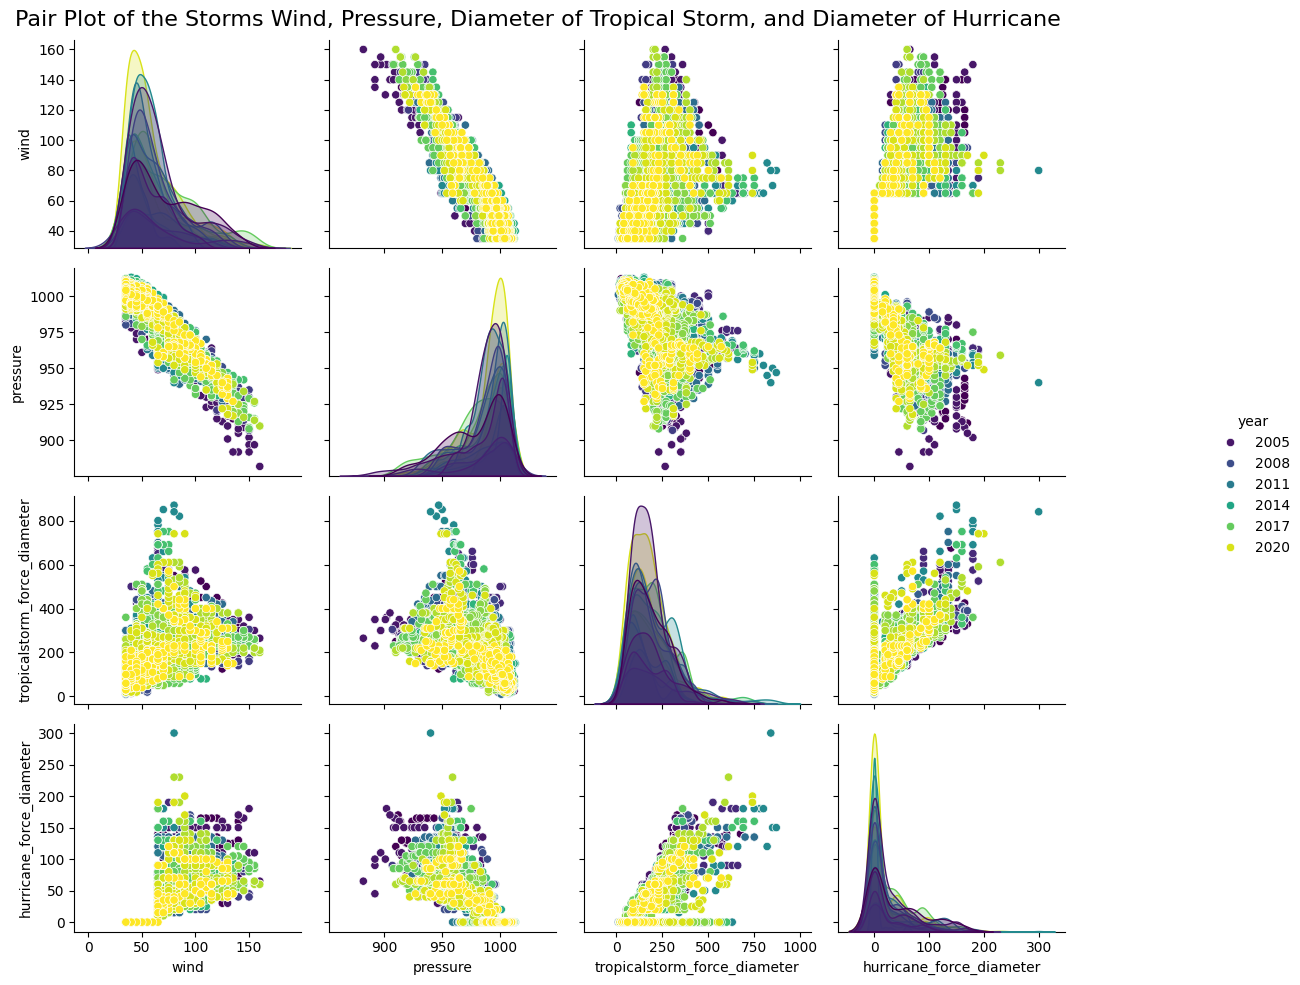

In [15]:
# Figure 1:

# Create a pair plot for selected columns to show the relationship between the Storm's wind, pressure, diameter of tropical storm, and diameter of hurricane
grid = sns.pairplot(
    clean_data,
    vars=['wind', 'pressure', 'tropicalstorm_force_diameter', 'hurricane_force_diameter'],   # Data columns to include
    hue='year',              # Color by the year
    palette='viridis'        # Specify color palette
)

# Add a title
plt.suptitle('Pair Plot of the Storms Wind, Pressure, Diameter of Tropical Storm, and Diameter of Hurricane', fontsize=16)


# Manually control the legend's position to move it more to the right
grid._legend.set_bbox_to_anchor((1.2, 0.5))

# Show the plot
plt.tight_layout()
plt.show()


**Figure 1:**

The pair plot visualizes the relationships between key variables in the dataset, specifically: Wind speed, Pressure, Tropical storm force diameter, and Hurricane force diameter. Also, the points in the plot are colored based on the year of the storm, so each color represents storms from different years.

The diagonal plots are density plots showing the distribution of each individual variable (wind, pressure, tropical storm force diameter, and hurricane force diameter) and show how frequently each variable takes on different values.

The off-diagonal elements are scatter plots showing the relationships between pairs of variables. As such, I can see that:

Wind vs. Pressure: Shows how wind speed correlates with pressure. It shows that lower pressure is associated with stronger storms (higher wind speed).

Wind vs. Tropical Storm Force Diameter: Shows the relationship between the wind speed and the diameter of tropical storms. This relationship can give insights into how the size of a storm is related to its wind speed.

Pressure vs. Tropical Storm Force Diameter: Shows how pressure varies with the diameter of tropical storms.

Tropical Storm Force Diameter vs. Hurricane Force Diameter: Shows how the size of a tropical storm compares with the size of a hurricane.

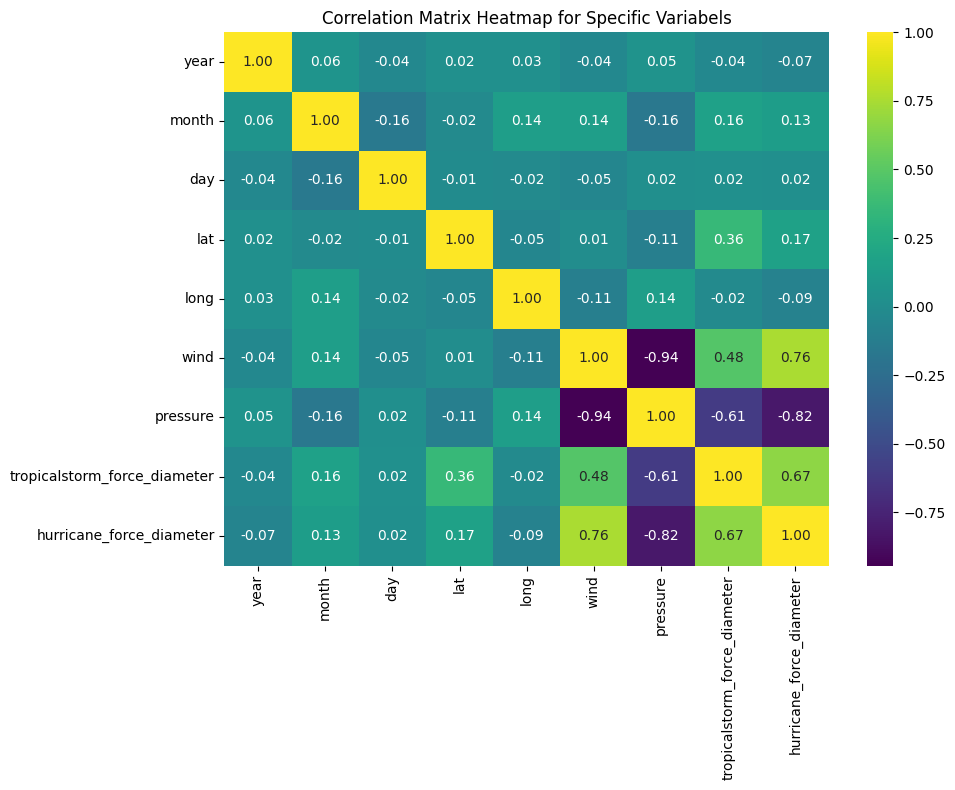

In [16]:
# Figure 2:

# Compute the correlation matrix
correlation_matrix = clean_data[['year', 'month', 'day','lat', 'long','wind', 'pressure', 'tropicalstorm_force_diameter', 'hurricane_force_diameter']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', cbar=True)

# Add a title
plt.title('Correlation Matrix Heatmap for Specific Variabels')

# Show the plot
plt.tight_layout()
plt.show()


**Figure 2:**

The plot shows the correlation matrix heatmap, which visualizes the strength and direction of relationships between different selected variables in my dataset. I can see that there is a:

1- Strong positive correlations between: Wind and Hurricane Force Diameter (0.76) and Tropical Storm Force Diameter and Hurricane Force Diameter (0.67).

2- Strong negative correlations between: Wind and Pressure (-0.94), Pressure and Tropical Storm Force Diameter (-0.61), and Pressure and Hurricane Force Diameter (-0.82).

3- Moderate positive correlation between: Wind and Tropical Storm Force Diameter (0.48)

4- Weak correlations between: Year and other variables (wind, pressure, and both force diameters), and Latitude and Longitude with most variables, indicating minimal geographic influence on storm characteristics.

Overall:

- There are strong positive correlations between wind and both diameters (hurricane and tropical storm).
- Wind and pressure have a strong negative correlation, as expected.
- Tropical Storm Force Diameter and Hurricane Force Diameter are moderately positively correlated, which makes sense since larger tropical storms tend to have larger hurricane diameters.
- Most of the relationships involving year, latitude, and longitude are weak, indicating little time-based or geographical influence on storm characteristics.

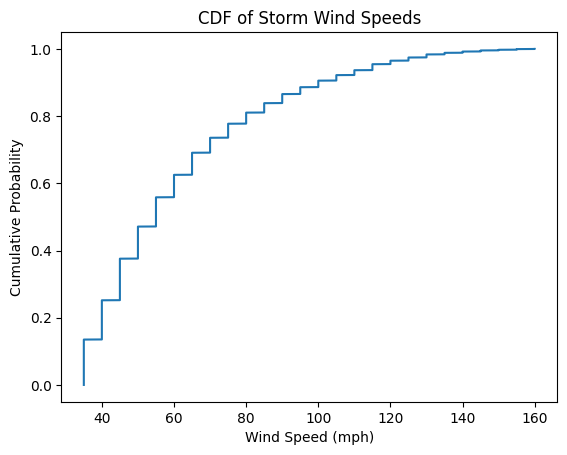

In [17]:
# Figure 3:

# Select the column from the dataset
data = clean_data['wind']

# Sort the data
sorted_data = np.sort(data)

# Calculate the CDF
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the CDF
plt.plot(sorted_data, cdf)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Storm Wind Speeds')
plt.show()

**Figure 3:**

The plot above is a Cumulative Distribution Function (CDF) of storm wind speeds, showing the cumulative probability of wind speeds up to a given value. The X-axis represents wind speed (in mph), and the Y-axis shows the cumulative probability. The plot reveals that most storms in the dataset have lower wind speeds, with a steep increase at lower values. As wind speed increases, the cumulative probability gradually approaches 1, indicating that fewer storms have extreme wind speeds. This suggests that stronger storms with very high wind speeds (greater than 150 mph) are relatively rare compared to weaker storms.

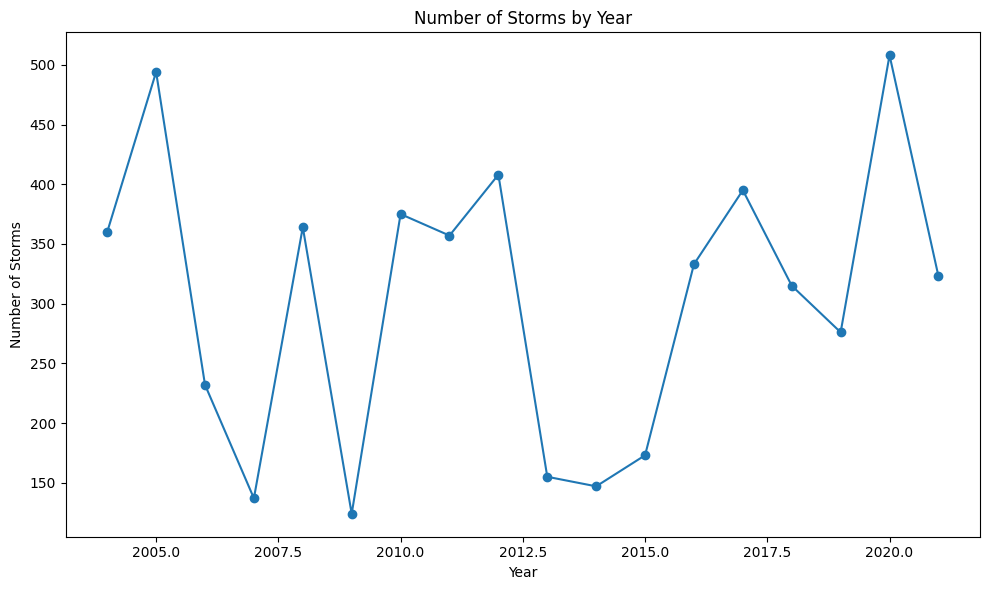

In [18]:
# Figure 4:

# Count the number of storms per year
storms_per_year = clean_data.groupby('year').size()

# Plot the time series
plt.figure(figsize=(10, 6))
storms_per_year.plot(kind='line', marker='o')


# Add title and labels
plt.title('Number of Storms by Year')
plt.xlabel('Year')
plt.ylabel('Number of Storms')

# Show the plot
plt.tight_layout()
plt.show()

**Figure 4:**

This plot illustrates the number of storms recorded each year, showing significant fluctuations in the storm's frequency over time. For example, I can see that years like 2005 and 2020 experienced very high numbers of storms, while there is a noticeable dip in storm occurrences in 2007, 2009, and 2013, indicating a period of lower storm activity. Overall, the data does not show a consistent upward or downward trend, suggesting that storm frequency varies considerably from year to year. This variability could be influenced by a range of factors, including environmental conditions, climate change, and data collection practices.

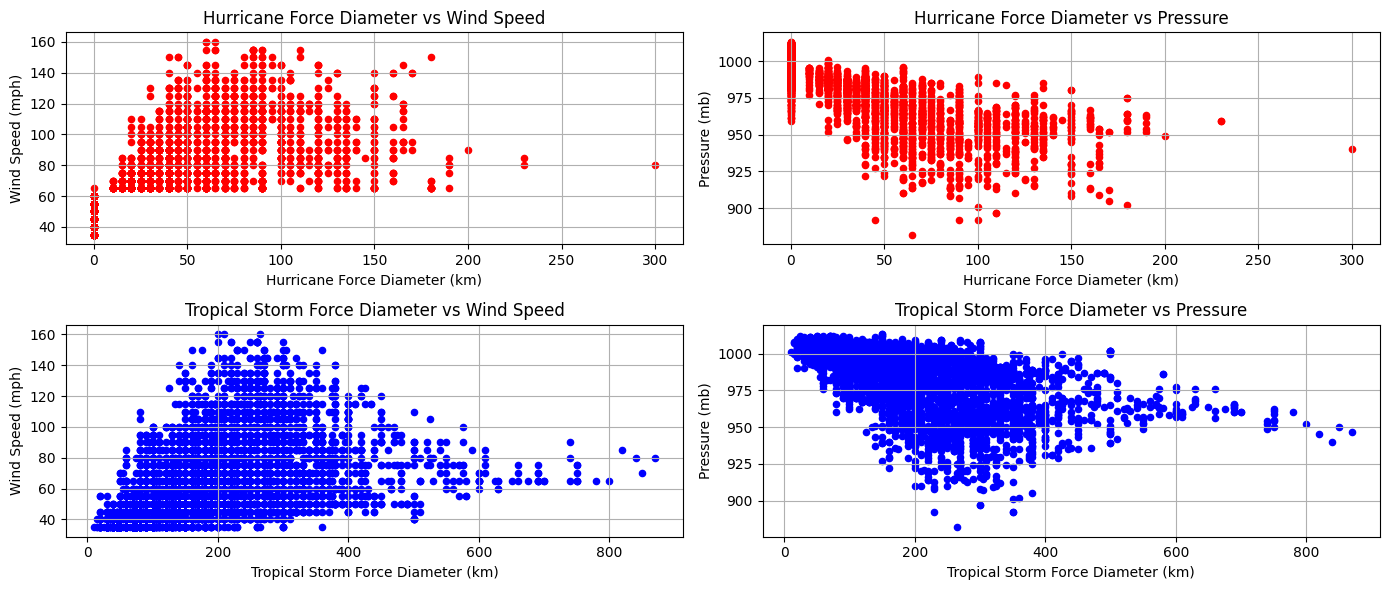

In [19]:
# Figure 5:

# Four subplots comparing Hurricane Force Diameter and Tropical Storm Force Diameter against Wind and Pressure

# Create a figure for the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Scatter Plot 1: Hurricane Force Diameter vs Wind
clean_data.plot.scatter(x='hurricane_force_diameter', y='wind', ax=axes[0,0], color='red')
axes[0,0].set_title('Hurricane Force Diameter vs Wind Speed')
axes[0,0].set_xlabel('Hurricane Force Diameter (km)')
axes[0,0].set_ylabel('Wind Speed (mph)')
axes[0,0].grid(True)

# Scatter Plot 2: Hurricane Force Diameter vs Pressure
clean_data.plot.scatter(x='hurricane_force_diameter', y='pressure', ax=axes[0,1], color='red')
axes[0,1].set_title('Hurricane Force Diameter vs Pressure')
axes[0,1].set_xlabel('Hurricane Force Diameter (km)')
axes[0,1].set_ylabel('Pressure (mb)')
axes[0,1].grid(True)

# Scatter Plot 3: Hurricane Force Diameter vs Wind
clean_data.plot.scatter(x='tropicalstorm_force_diameter', y='wind', ax=axes[1,0], color='blue')
axes[1,0].set_title('Tropical Storm Force Diameter vs Wind Speed')
axes[1,0].set_xlabel('Tropical Storm Force Diameter (km)')
axes[1,0].set_ylabel('Wind Speed (mph)')
axes[1,0].grid(True)


# Scatter Plot 4: Hurricane Force Diameter vs Pressure
clean_data.plot.scatter(x='tropicalstorm_force_diameter', y='pressure', ax=axes[1,1], color='blue')
axes[1,1].set_title('Tropical Storm Force Diameter vs Pressure')
axes[1,1].set_xlabel('Tropical Storm Force Diameter (km)')
axes[1,1].set_ylabel('Pressure (mb)')
axes[1,1].grid(True)

# Show plots
plt.tight_layout()
plt.show()

**Figure 5:**

The scatter plot above is a matrix showing the relationships between different pairs of storm characteristics, specifically: Hurricane Force Diameter vs Wind Speed, Hurricane Force Diameter vs Pressure, Tropical Storm Force Diameter vs Wind Speed, and Tropical Storm Force Diameter vs Pressure.

1- The Hurricane Force Diameter vs Wind Speed plot shows that wind speeds for hurricane-force storms generally range from about 60 mph to 140 mph. There is a moderate positive correlation between the diameter and wind speed, as larger hurricanes tend to have higher wind speeds.

2- The Hurricane Force Diameter vs Pressure plot shows an inverse relationship, as the hurricane force diameter increases, the pressure generally decreases, which is typical for stronger storms. Larger hurricanes tend to have lower pressures.

3- The Tropical Storm Force Diameter vs Wind Speed plot shows that wind speeds for tropical storm-force storms mostly range from 40 mph to 125 mph. There is a strong positive correlation between the diameter and wind speed, with larger tropical storms generally having stronger winds.

4- The Tropical Storm Force Diameter vs Pressure shows a similar to the hurricane plot, there is an inverse relationship between diameter and pressure. Larger tropical storms tend to have lower pressures.


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


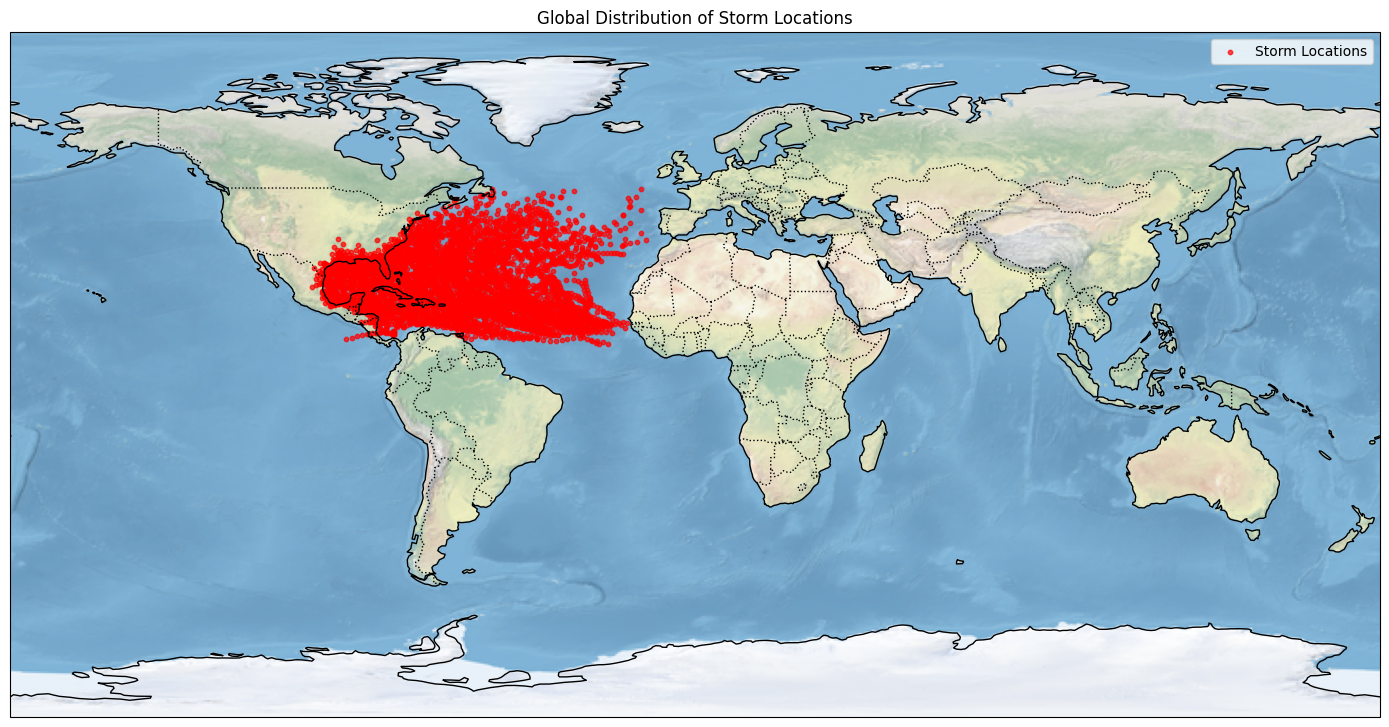

In [20]:
# Figure 6:

# Create a figure with a global projection
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add a background image of the Earth and map features
ax.stock_img()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Scatter Plot for Storm Locations (Latitude and Longitude)
plt.scatter(clean_data['long'], clean_data['lat'], color='red', s=10, transform=ccrs.PlateCarree(), alpha=0.7, label='Storm Locations')

# Add title and legend
plt.title('Global Distribution of Storm Locations')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Ignore the warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='cartopy')

**Figure 6:**

The map shows the global distribution of storm locations. The red dots represent the geographic locations where storms have occurred, plotted by their latitude and longitude coordinates. I can see a high concentration of storms located in the Atlantic Ocean, particularly around the Caribbean and the Gulf of Mexico, indicating that many storms occur in these areas, which are prone to hurricanes and tropical storms. The distribution shows how storms tend to follow certain paths, primarily affecting coastal and oceanic regions. This visualization helps identify storm-prone areas, offering valuable insights for risk assessment, disaster preparedness, and climate studies.

## Section 3: Supervised Classification Learning Methods

### Splitting the data

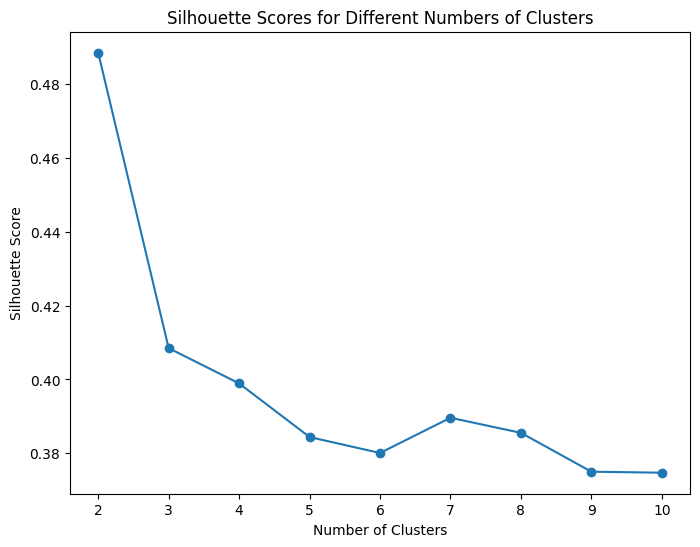

In [21]:
# Figure 7:

# To account for spatial autocorrelation I will do K-means Clustering on the dataset for latitudes and longitudes
# So first I will do the silhouette score to find the ideal number of clusters depending on the spatial distribution of the data

# Extract latitude and longitude for clustering
coordinates = clean_data[['lat', 'long']]

# Check silhouette score for different cluster numbers
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coordinates)
    sil_score = silhouette_score(coordinates, kmeans.labels_)
    sil_scores.append(sil_score)

# Plot silhouette scores for different numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o')

# Add title and labels
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Show the plot
plt.show()

**Figure 7:**

Based on the plot, I can see that the silhouette score is highest when k = 2, and then it rapidly decreases as the number of clusters increases. This suggests that the storm dataset might naturally split into two main geographical areas. So, I will perform the K-means clustering with K=2.


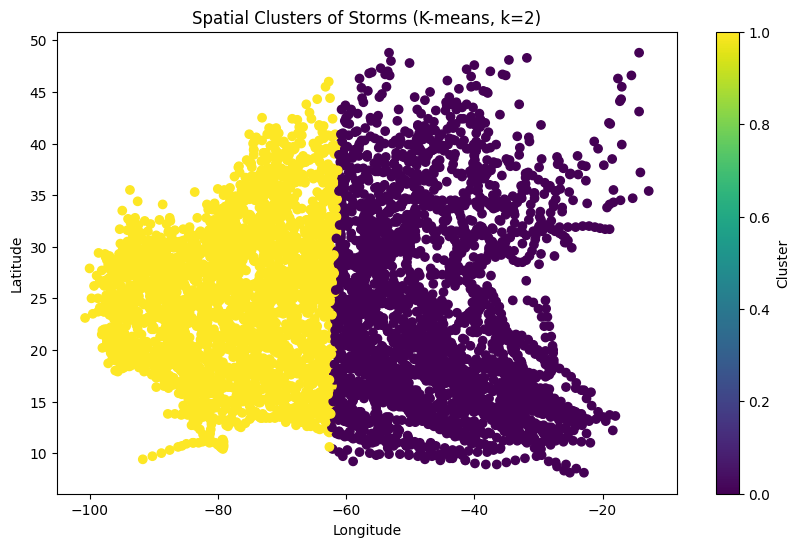

In [22]:
# Figure 8:

# Apply K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
clean_data['cluster'] = kmeans.fit_predict(clean_data[['lat', 'long']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['long'], clean_data['lat'], c=clean_data['cluster'], cmap='viridis')

# Add title and labels
plt.title('Spatial Clusters of Storms (K-means, k=2)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')

# Show the plot
plt.show()

**Figure 8:**

The plot shows the K-means clustering results of the storm data based on latitude and longitude.The data points are separated into two distinct clusters of storms based on their spatial locations (latitude and longitude).

In [51]:
# Applying temporal split on the data to account for temporal autocorrelation since my dataset is from 2004 to 2021

# Training on years <= 2013, testing on years > 2013
train_data = clean_data[clean_data['year'] <= 2013]
test_data = clean_data[clean_data['year'] > 2013]

In [24]:
# Applying spatial split on the data to account for spatial autocorrelation

# Use cluster 0 for training and cluster 1 for testing
train_data = train_data[train_data['cluster'] == 0]
test_data = test_data[test_data['cluster'] == 1]

In [25]:
# Extract features (X) and target variable (y)
X_train = train_data[['wind', 'pressure', 'tropicalstorm_force_diameter', 'hurricane_force_diameter']]
y_train = train_data['status']

X_test = test_data[['wind', 'pressure', 'tropicalstorm_force_diameter', 'hurricane_force_diameter']]
y_test = test_data['status']

# Output the shapes of the training and testing sets
print(f'Training set shape: X_train={X_train.shape}, y_train={y_train.shape}')
print(f'Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}')

Training set shape: X_train=(1346, 4), y_train=(1346,)
Testing set shape: X_test=(1305, 4), y_test=(1305,)


In the above section, I split the storm dataset into training and testing sets based on both temporal and spatial considerations to account for autocorrelation. For the temporal split, I used data from the years 2013 and before for training and data after 2013 for testing. For the spatial split, I assigned data from cluster 0 (based on spatial clustering) to the training set and data from cluster 1 to the test set. Then, I selected the relevant features such as wind, pressure, tropical storm force diameter, and hurricane force diameter to detect the target variable, which is status for both sets. This ensures that the data used for training and testing maintains both spatial and temporal independence. Finally, I printed the shapes of the train and test sets to confirm the correct data split.

###Standardizing the data

In [26]:
# Standardizing the data for the supervised classification learning methods

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the training data (fit and transform)
X_train_scaled = scaler.fit_transform(X_train)

# Normalize the testing data (transform using the training set's parameters)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Check the distribution of target variable
y_train.value_counts(), y_test.value_counts()

(status
 tropical storm    877
 hurricane         469
 Name: count, dtype: int64,
 status
 tropical storm    760
 hurricane         545
 Name: count, dtype: int64)

In this section, I standardized the features of the dataset using StandardScaler to prepare the data for the supervised machine learning models that assume the features are normally distributed. Then, I checked the distribution of the target variable (status) in both the training and testing sets. It showed that the training set contains 877 tropical storms and 469 hurricanes, while the test set has 760 tropical storms and 545 hurricanes. This shows a mild class imbalance in the dataset, where tropical storms are more frequent than hurricanes, but this imbalance is not severe. As such, I can consider that this as a fairly balanced distribution of the target classes.

###Method 1: Logistic Regression


In [28]:
# Step 1: Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Step 2: Train the model on the scaled training data
logreg.fit(X_train_scaled, y_train)

# Step 3: Predict using the scaled test data
logreg_preds = logreg.predict(X_test_scaled)

# Step 4: Evaluate the model's performance
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_report = classification_report(y_test, logreg_preds)

# Step 5: Print results
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Classification Report:")
print(logreg_report)

Logistic Regression Accuracy: 0.9969348659003832
Logistic Regression Classification Report:
                precision    recall  f1-score   support

     hurricane       1.00      0.99      1.00       545
tropical storm       0.99      1.00      1.00       760

      accuracy                           1.00      1305
     macro avg       1.00      1.00      1.00      1305
  weighted avg       1.00      1.00      1.00      1305



The model is performing very well. Both classes have excellent precision, recall, and F1-scores, indicating that the model is doing very well for both tropical storms and hurricanes. Logistic Regression is a relatively simple model that works effectively with well-structured data and good feature separation.

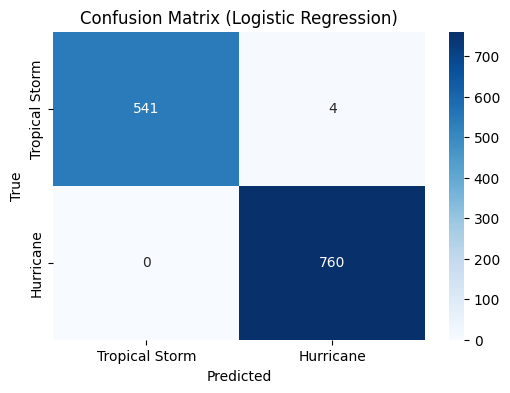

In [29]:
# Figure 9:

# Generate confusion matrix
cm = confusion_matrix(y_test, logreg_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tropical Storm', 'Hurricane'], yticklabels=['Tropical Storm', 'Hurricane'])

# Add titles and labels
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

**Figure 9:**

The confusion matrix shows the true positives (correct predictions) and false positives (incorrect predictions) for each class, Tropical Storm and Hurricane.

- True Positives (Diagonal): The model correctly predicted 541 samples as Tropical Storm and 760 samples as Hurricane.

- False Positives: The model predicted 4 Tropical Storms as Hurricanes, indicating a misclassification, but it is minor.





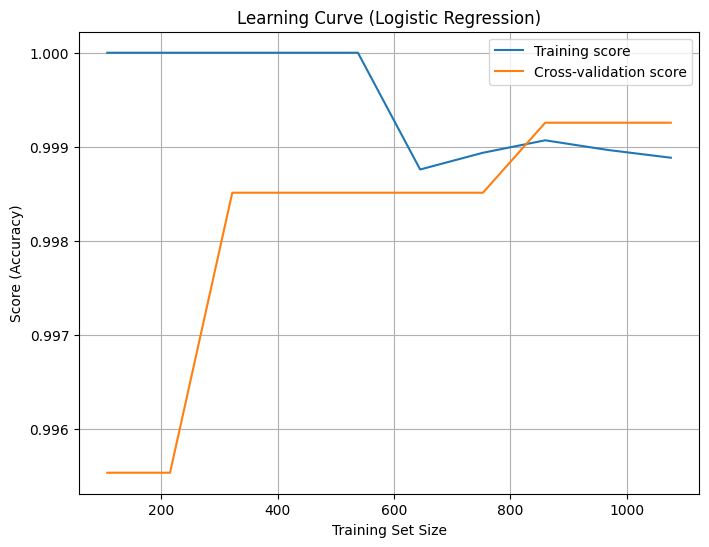

In [30]:
# Figure 10:

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(logreg, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score")

# Add titles, labels and legend
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training Set Size")
plt.ylabel("Score (Accuracy)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

**Figure 10:**

The learning curve plot gives useful insights into the performance of the Logistic Regression model as the training set size increases. The training score stays close to 1.0 as the training set size increases. This suggests that the model is fitting the training data very well. However, as the model is trained on more data, the increase in performance stabilizes. The cross-validation score starts lower and gradually increases as the training set size increases. The score levels off after the training set reaches around 300 samples.

The cross-validation score gives a better indication of how well the model generalizes to unseen data. The fact that it eventually stabilizes close to the training score indicates that the model is not overfitting, so it is not just memorizing the training data, as there is no large gap between the two lines.


###Method 2: K-Nearest Neighbors (KNN)

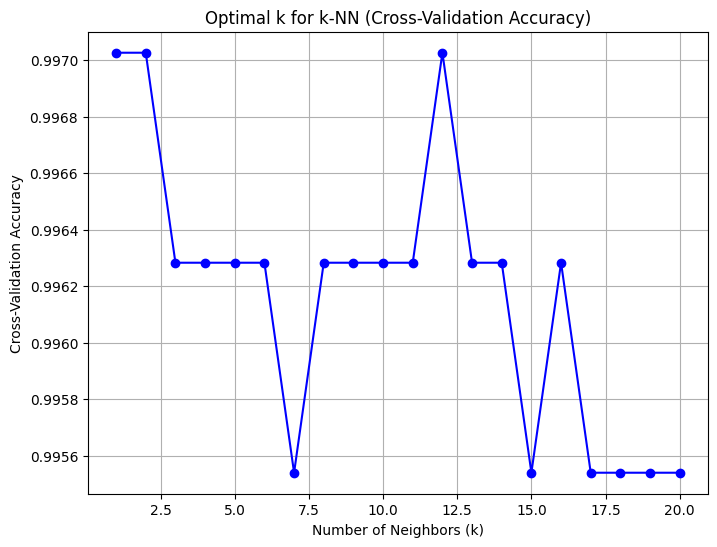

In [31]:
# Figure 11:

# Before doing KNN I want to identify the optimal number of neighbors to use for the KNN model

# Range of k values to test
k_values = range(1, 21)

# List to store mean cross-validation scores for each k
mean_cv_scores = []

# Loop through different k values and calculate the cross-validation score
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    mean_cv_scores.append(cv_scores.mean())

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_cv_scores, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Optimal k for k-NN (Cross-Validation Accuracy)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)

# Show the plot
plt.show()

**Figure 11:**

This plot shows the accuracy of the K-Nearest Neighbors (KNN) model as the number of neighbors (k) varies from a range of 1 to 21, and it helps identify the optimal number of neighbors to use for the KNN model. It appears that the accuracy fluctuates based on the number of neighbors. The accuracy seems to peak at certain values of k, then starts to decrease as K increases beyond a certain point, but there is no clear, consistent increase.

Also, the plot shows that the model performs best when k = 1, with a cross-validation accuracy around 0.9970, which can be seen as the optimal choice. However, k = 1 could also make the model sensitive to noise or outliers, so it is better to go with a higher K value like K=6.

In [44]:
# Step 1: Initialize the k-NN model with k=6 (based on the cross-validation)
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

# Step 2: Train the model on the scaled training data
knn.fit(X_train_scaled, y_train)

# Step 3: Predict using the scaled test data
knn_preds = knn.predict(X_test_scaled)

# Step 4: Evaluate (score) the model's performance
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_report = classification_report(y_test, knn_preds)

# Step 5: Print results
print("k-NN Accuracy:", knn_accuracy)
print("k-NN Classification Report:")
print(knn_report)

k-NN Accuracy: 0.9992337164750957
k-NN Classification Report:
                precision    recall  f1-score   support

     hurricane       1.00      1.00      1.00       545
tropical storm       1.00      1.00      1.00       760

      accuracy                           1.00      1305
     macro avg       1.00      1.00      1.00      1305
  weighted avg       1.00      1.00      1.00      1305



The precision, recall, and F1-score for both Tropical Storm and Hurricane are all 1.00, indicating that the model is accurate in predicting both categories of the test set. The overall accuracy is 99.92% across the entire dataset, which is very high and shows that the model is performing exceptionally well.


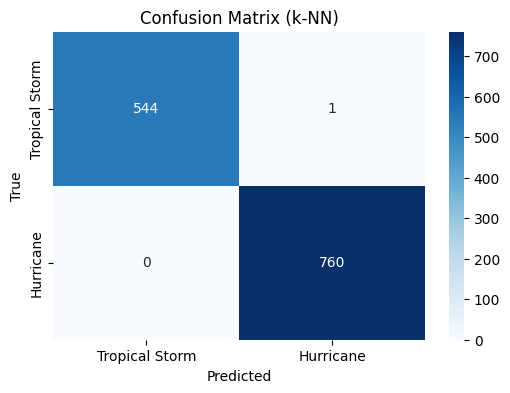

In [49]:
# Figure 12:

# Generate confusion matrix
cm_knn = confusion_matrix(y_test, knn_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Tropical Storm', 'Hurricane'], yticklabels=['Tropical Storm', 'Hurricane'])

# Add titles and labels
plt.title('Confusion Matrix (k-NN)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

**Figure 12:**

The confusion matrix shows that the model’s accuracy is very good for this classification problem. It shows 544 Tropical Storms were correctly predicted as Tropical Storm and 760 Hurricanes were correctly predicted as Hurricane. There is 1 misclassification, but is very minor and does not significantly affect the model’s performance.


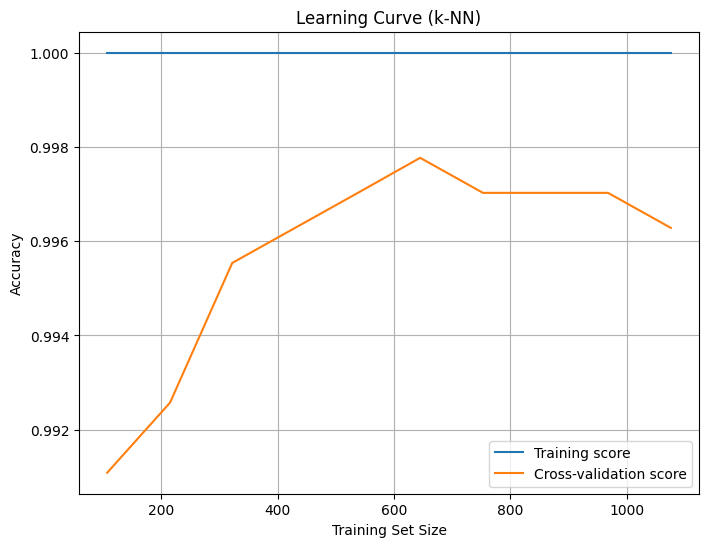

In [50]:
# Figure 13:

# Initialize the k-NN model (with k=6)
knn = KNeighborsClassifier(n_neighbors=6)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score")

# Add title and labels
plt.title('Learning Curve (k-NN)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

**Figure 13:**

The learning curve for the k-NN model shows the relationship between the training set size and the model's performance in terms of accuracy. The training score starts at a high value and remains constant at 1.0 for all training set sizes. This indicates that the k-NN model is fitting the training data perfectly, regardless of the size of the training set. The cross-validation score increases as the training set size grows, indicating that the model is improving its generalization with more data. The cross-validation score levels off at around 0.996, which shows the model is reaching a point of stable performance with additional training data. The model's perfect performance on the training data (score of 1.0) suggests that it might be overfitting in the initial stages. As the training set size increases, the cross-validation score becomes more stable and shows that the model is generalizing well.


###Method 3: Gradient Boosting Classifier

In [35]:
# I first want to perform hyperparameter tuning to find the best parameters for the Gradient Boosting Classifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of boosting stages (trees)
    'learning_rate': [0.001, 0.01, 0.1],  # Step size for each boosting stage
    'max_depth': [3, 5, 7],                # Maximum depth of each tree
    'subsample': [0.8, 0.9, 1.0]           # Fraction of samples for fitting each tree
}

# Initialize the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model with the best parameters
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print best parameters and score
print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validation Accuracy: 1.0


In the code above, I am doing hyperparameter tuning with GridSearchCV. This will help in performing an exhaustive search over a specified parameter grid, evaluating each combination using cross-validation to give me the best parametrs for my dataset to use in the Gradient Boosting Classifier model.



In [36]:
# Step 1: Initialize the best Gradient Boosting Classifier with the best parameters from the previous code
best_gbc = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    random_state=42
)

# Step 2: Fit the best Gradient Boosting model
best_gbc.fit(X_train_scaled, y_train)

# Step 3: Predict using the scaled test data
best_gbc_preds = best_gbc.predict(X_test_scaled)

# Step 4: Evaluate the model's performance
best_gbc_accuracy = accuracy_score(y_test, best_gbc_preds)
best_gbc_report = classification_report(y_test, best_gbc_preds)

# Step 5: Print the results
print("Best Gradient Boosting Classifier Accuracy:", best_gbc_accuracy)
print("Best Gradient Boosting Classifier Classification Report:")
print(best_gbc_report)

Best Gradient Boosting Classifier Accuracy: 0.9992337164750957
Best Gradient Boosting Classifier Classification Report:
                precision    recall  f1-score   support

     hurricane       1.00      1.00      1.00       545
tropical storm       1.00      1.00      1.00       760

      accuracy                           1.00      1305
     macro avg       1.00      1.00      1.00      1305
  weighted avg       1.00      1.00      1.00      1305



Precision, Recall, and F1-Score for both Hurricane and Tropical Storm are 1.00. This means that the model is highly precise in predicting both classes. The overall accuracy is 99.9% (almost 100%), which indicates that the model is performing very well. Also, the Macro avg and Weighted avg both remain 1.0 in terms of precision, recall, and F1-score, suggesting that the model is balanced and performs similarly across both categories.



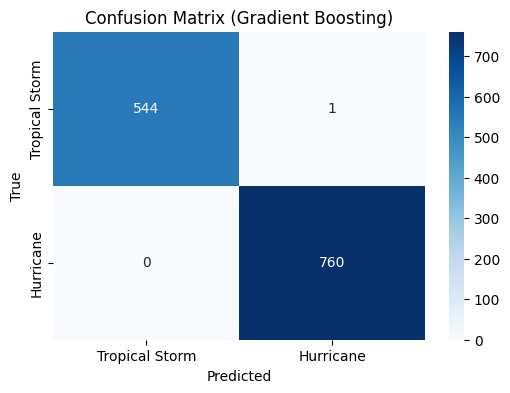

In [37]:
# Figure 14:

# Generate confusion matrix for the best Gradient Boosting model
cm_gbc = confusion_matrix(y_test, best_gbc_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=['Tropical Storm', 'Hurricane'], yticklabels=['Tropical Storm', 'Hurricane'])

# Add titles and labels
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

**Figure 14:**

The confusion matrix shows 688 Hurricanes are correctly classified as Hurricanes, and 544 Tropical Storms are correctly classified as Tropical Storms.
However, there is 1 Tropical Storm predicted as a Hurricane, indicating a misclassification, but it is very minimal.

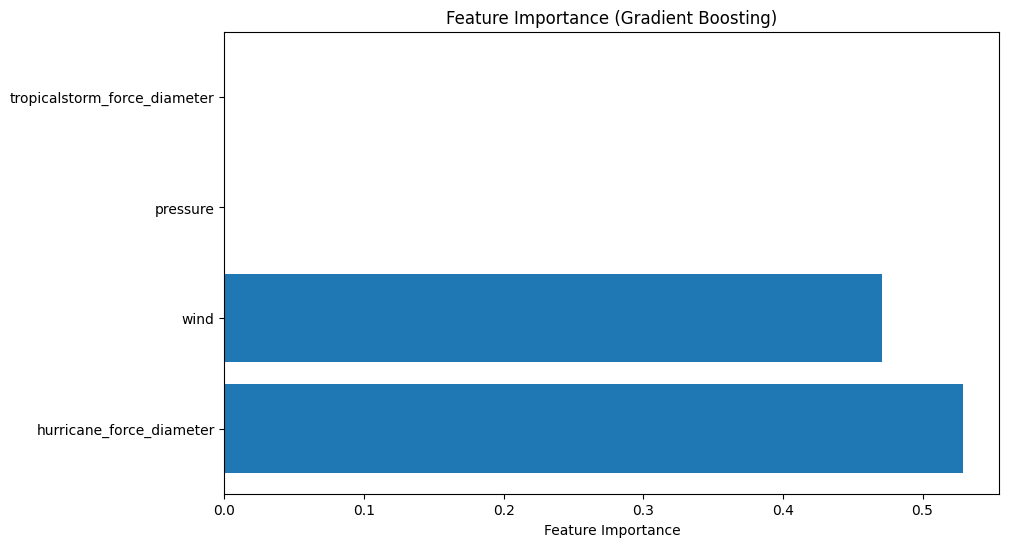

In [38]:
# Figure 15:

# Get feature importances from the trained Gradient Boosting model
feature_importances = best_gbc.feature_importances_

# Specify the feature names
features = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Sort the feature importances and plot
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))

# Add titles and labels
plt.title("Feature Importance (Gradient Boosting)")
plt.barh(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), [features[i] for i in indices])
plt.xlabel("Feature Importance")

# Show the plot
plt.show()

**Figure 15:**

The feature importance is used to understand how much each feature (variable) contributes to the decision-making process of the Gradient Boosting Classifier. So, this plot provides insight into which features are most influential in predicting the target variable. The plot shows that wind and hurricane force diameter are the most important features. At the same time, it appears that pressure and tropical storm force diameter are less important in making predictions compared to wind and hurricane force diameter. This migth be due to correlation with other features. For example, if pressure and tropical storm force diameter are highly correlated with other features such as wind or hurricane force diameter, the model might rely more on the stronger features and not on the correlated features. To check this, I will visualize the correlation matrix for the scaled training data that is used in the model.

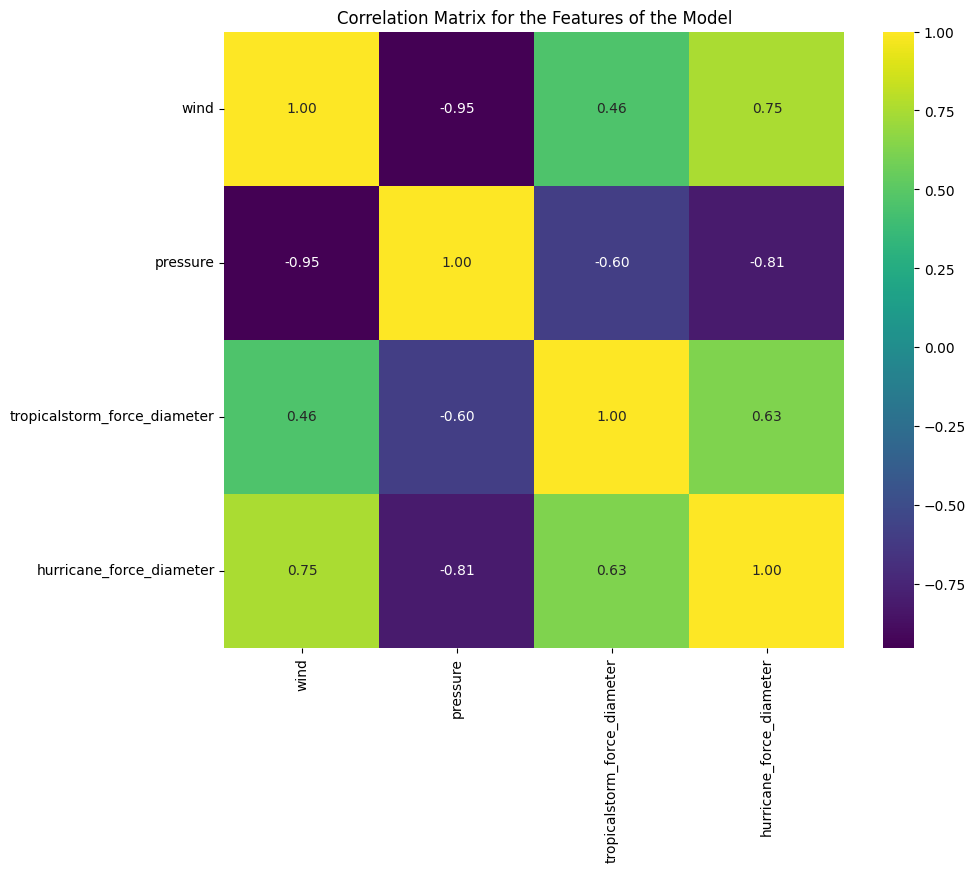

In [46]:
# Figure 16:

# Convert X_train_scaled to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['wind', 'pressure', 'tropicalstorm_force_diameter', 'hurricane_force_diameter'])

# Compute the correlation matrix
correlation_matrix = X_train_scaled_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')

# Add Title
plt.title("Correlation Matrix for the Features of the Model")

# Show the plot
plt.show()

**Figure 16:**

The correlation matrix plotted shows the relationships between the models key features. I can see that:

- Wind and Pressure have a strong positive correlation (-0.95). This means that as wind increases, pressure tends to decrease, which makes sense in meteorology since stronger winds are typically associated with lower pressure in storms.


- Wind and Tropical Storm Force Diameter have a moderate positive correlation (0.46). This means that stronger winds might correlate with a larger storm diameter, but it's not as strong as the correlation with pressure.

- Pressure and Hurricane Force Diameter have a strong negative correlation (-0.81). This suggests that as pressure decreases, the hurricane force diameter tends to increase.

- Tropical Storm Force Diameter and Hurricane Force Diameter have a moderate positive correlation (0.63). This indicates that larger tropical storm diameters tend to be associated with larger hurricane force diameters.

These strong correlations, especially between wind and pressure, and between pressure and hurricane force diameter, could explain why the model assigned low importance to features like pressure and tropical storm force diameter. The Gradient Boosting model likely learned that wind and hurricane force diameter provide more direct information for classification, while pressure and tropical storm force diameter have a weaker, indirect relationship with the target variable.



##Conclusion:

This project utilized three supervised classification models, Logistic Regression, k-Nearest Neighbors (k-NN), and Gradient Boosting Classifier, to predict storm types (Tropical Storm vs. Hurricane) based on meteorological features such as wind speed, pressure, and storm size (diameter). The data was standardized to ensure that all features were on a comparable scale, optimizing the performance of the models. In addition, I applied a spatial and temporal split to account for autocorrelation, ensuring the training and testing sets were independent.

The results showed that all models performed exceptionally well, achieving high accuracy scores (over 99%) and perfect precision, recall, and F1-scores for both storm types. Logistic Regression, a simpler linear model, showed great performance despite its simplicity, confirming that even basic models can be highly effective with well-defined features. The k-NN model with k=6 demonstrated strong generalization, with the cross-validation score stabilizing as the training set size increased, confirming the model's robustness. The Gradient Boosting Classifier provided deeper insights into feature importance, highlighting wind and hurricane-force diameter as the most significant factors for classification. The exceptional model performance and the high accuracy can be attributed to several key factors:
1.	Well-Defined Features: Features like wind, pressure, and diameter are strong indicators of the target variable (storm type). Their ability to predict effectively helped the models easily distinguish between Tropical Storms and Hurricanes, resulting in high performance.
2.	Model Overfitting: Overfitting can be the reason for the extremely high accuracy on the training set. However, overfitting is less likely since I am also getting high performance on the test set. Nevertheless, overfitting could still happen if the model’s data is too clean (especially for models like k-NN with low k).
3.	Clean Data and Proper Data Split: The data was well-prepared and cleaned, with a proper train-test split that accounted for temporal and spatial autocorrelation. This might have led the models to generalize exceptionally well on the test set and were not biased by any unwanted patterns in the data.

4.  Data Leakage: If the temporal or spatial splits were not properly executed, there might have been an unintentional overlap of the information between the training and testing sets. For example, the latitude, longitude, and time features might have unintentionally provided clues that led the models to make very confident predictions, essentially 'cheating' by relying on these factors. This would cause the models to perform very well on the test set, but the results might not generalize well to unseen data. Ensuring a more robust and careful split of the data would help mitigate the risk of data leakage and lead to more reliable results.

As such, given the well-defined features, the careful handling of the model overfitting, the clean data and proper splits, and the potential risks of data leakage, the high accuracy and strong performance metrics are likely due to a combination of these factors, which allowed the models to generalize well and predict effectively.

These findings support the idea that meteorological data is highly effective in distinguishing between Tropical Storms and Hurricanes and that machine learning methods are capable of achieving accurate storm classification. The models' high performance suggests that these techniques could be applied to real-world forecasting systems.

Future work could involve fine-tuning the models, exploring additional features such as storm trajectory or atmospheric pressure, and testing the models on more diverse datasets to further improve prediction accuracy.

##Questions:

**1- Which method did you like the most?**

The method I liked the most is the Gradient Boosting Classifier, as I found it to be the most effective method in this project. While all models performed well, Gradient Boosting provided more insight into feature importance, which was helpful for understanding which features (such as wind speed and hurricane force diameter) had the most influence on the predictions.

**2- Which method did you like the least?**

The method I liked the least is the k-Nearest Neighbors (k-NN). While it performed well, I found it less intuitive compared to the other models. One challenge I faced was in selecting the optimal value of k, as the accuracy showed fluctuating variations across different values, making it difficult to pinpoint the best value. Also, the model's sensitivity to the choice of k and the fact that it didn’t provide a clear indication of feature importance made it harder to understand the underlying relationships in the data. Given that k-NN relies on local data for prediction, it may not be the best fit for binary classification tasks like distinguishing between Tropical Storms and Hurricanes, where the differences in meteorological features such as wind speed and pressure are more distinct and can be captured more effectively by models like Gradient Boosting. Moreover, there is a possibility that k-NN may have been prone to overfitting with k=1 or smaller values of k, as it showed perfect accuracy in earlier experiments I did when trying different K values. This could have led the model to memorize the training data, making it less robust to new data.

**3- How did you score these supervised models?**

I scored each of the models using classification reports and confusion matrices. The confusion matrix gave me valuable insight into the model's performance by showing the number of true positives, false positives, true negatives, and false negatives, helping to identify where the models were making mistakes in classifying the storm types. The classification report provided more comprehensive performance metrics such as accuracy, precision, recall, and F1-score. Accuracy measured the overall correct predictions, while precision, recall, and F1-score gave me a better understanding of how well the models handled both classes (Tropical Storms and Hurricanes), especially in terms of minimizing false positives and false negatives. These metrics were crucial in ensuring that the models not only predicted accurately but also managed class imbalance effectively, as precision and recall help evaluate performance for each class separately.


**4- Did the output align with your geologic understanding?**

Yes, the output aligns well with my geologic understanding, as the models effectively distinguished between Tropical Storms and Hurricanes based on key features such as wind speed, pressure, and storm diameter, which are known to be critical factors in classifying these storm types. This is consistent with the general scientific understanding, as meteorologists use these factors to differentiate between the two.

The high performance across all three models, with excellent accuracy, precision, recall, and F1-scores, supports this understanding, as it shows that the models correctly classified the storm types based on these key features. The feature importance analysis from the Gradient Boosting Classifier further validated this, highlighting wind speed and hurricane force diameter as the most significant predictors, which reflect the physical processes of storm formation and intensity.






**5- Did you hyperparameter tune? Why or why not?**

Yes, I performed hyperparameter tuning for both k-Nearest Neighbors (k-NN) and Gradient Boosting Classifier. For k-NN, I tuned the k parameter to find the optimal number of neighbors. Since k-NN is highly sensitive to the choice of k, I experimented with different values to select the one that achieved the best performance. This allowed me to ensure that the model wasn't overfitting or underfitting by selecting the most appropriate number of neighbors for the data.

For the Gradient Boosting Classifier, I used GridSearchCV to tune the hyperparameters, including the number of estimators, learning rate, and maximum depth. GridSearchCV performed an exhaustive search over these hyperparameters, evaluating different combinations and selecting the best model based on cross-validation. This helped optimize the performance of the Gradient Boosting model and ensured it was able to capture complex patterns in the data without overfitting.

As for the Logistic Regression, I worked with the optimal default hyperparameters, and the learning curve helped me assess the robustness of the model. Hyperparameter tuning might be helpful to improve performance further, but given that the models performed well out-of-the-box, it wasn’t strictly necessary.


**6- How did you split your data? and why does that make sense for this dataset?**

For this dataset, I performed both temporal and spatial splits to ensure that the training and testing sets were independent and accounted for autocorrelation.

- In the temporal split, I divided the data based on year. The training set consisted of data from years <= 2013, while the test set contained data from > 2013. This makes sense for the storm dataset because storm data can show trends or patterns over time, and it's important to test the model on future data to evaluate how well it generalizes to unseen storms. By splitting the data temporally, I ensure that the model is not tested on data from the same time period it was trained on, which would lead to overfitting.

- In the spatial split, I used K-means clustering based on latitude and longitude to split the data into two spatial clusters. The training set consisted of data from cluster 0, while the test set used data from cluster 1. This spatial split is important because storms can exhibit regional differences in behavior, and using data from distinct geographic areas helps to account for spatial autocorrelation. It ensures that the model isn’t biased by spatial dependencies within the data and is instead able to generalize to different geographic areas.

This dual split (temporal and spatial) makes sense for this dataset because it mimics real-world forecasting scenarios, where we need models that can predict future storm occurrences (temporal generalization) and handle regional variations (spatial generalization). This approach ensures that the model is robust and capable of generalizing well across both time and space, which is critical for storm classification.

**7- What did you want to learn more about?**

I would like to dive deeper into the methods I used to understand how they differ from one another, as they produced very similar results. I'm also interested in exploring other methods like Support Vector Machine (SVM) to see how it performs and whether it yields similar results. Additionally, I want to explore whether the similarity in results is due to the nature of the dataset, user error, or if these methods naturally produce similar outputs.

Moreover, further exploration into feature importance and decision boundary visualization would be valuable to better understand the models' decision-making processes. One important aspect I’d like to investigate more is the issue of overfitting. Given the high accuracy of the models, especially for k-NN with smaller values of k, I suspect overfitting might be a concern, and I would like to explore techniques for detecting and addressing this issue.



**8- Did you pre-process your data? Do all models require pre-processing?**

Ys, I did a lot of pre-processing to the dataset Like:

- Cleaning the dataset: Removing missing or irrelevant data.
- Normalizing and scaling the data: This step was essential for the supervised learning models since some of them are sensitive to the scale of the data.
- Splitting the data by performing both temporal and spatial splits to ensure the data was split into training and testing sets that were independent, preventing data leakage and autocorrelation, which could negatively affect model performance.

Not all models require pre-processing, but some, like k-NN, benefit from normalization as they are distance-based algorithms. Gradient Boosting can function without normalization since tree-based models are less sensitive to feature scaling, but normalization can still help improve the model’s performance and training speed. Similarly, Logistic Regression can work without normalization, but it benefits from feature scaling because it is sensitive to the scale of input features, and normalization can improve convergence speed and model stability